In [78]:
#多维向量输入@多层神经网络
import torch
import numpy as np
import matplotlib.pyplot as plt

In [79]:
#数据集
xy=np.loadtxt('diabetes.csv.gz',delimiter=',',dtype=np.float32)
x_data=torch.from_numpy(xy[:,:-1])
y_data=torch.from_numpy(xy[:,[-1]])


In [80]:
#线性回归模型创建
class multlinearmodel(torch.nn.Module):
    def __init__(self):
        super(multlinearmodel,self).__init__()
        self.linear1=torch.nn.Linear(8,6)
        self.linear2=torch.nn.Linear(6,6)
        self.linear3=torch.nn.Linear(6,4)
        self.linear4=torch.nn.Linear(4,1)
        self.sigmoid1=torch.nn.ReLU()
        self.sigmoid2=torch.nn.Sigmoid()
        
    

    def forward(self,x):
        x=self.sigmoid1(self.linear1(x))
        x=self.sigmoid1(self.linear2(x))
        x=self.sigmoid1(self.linear3(x))
        x=self.sigmoid2(self.linear4(x))
        return x


In [81]:
#实例化
myline=multlinearmodel()

#损失，优化建立
criterion=torch.nn.BCELoss(reduction='mean')
optimizer=torch.optim.SGD(myline.parameters(),lr=0.05)

In [82]:
#训练模型
epo=[]
los=[]
for epoch in range(10000):
    #向前传播
    y_pred=myline.forward(x_data)
    loss=criterion(y_pred,y_data)
    print(epoch,loss.item())
    epo.append(epoch)
    los.append(loss.item())

    #反向传播
    optimizer.zero_grad()
    loss.backward()

    #更新
    optimizer.step()


0 0.7804698348045349
1 0.7765670418739319
2 0.7727775573730469
3 0.7690978646278381
4 0.7655245065689087
5 0.7620540261268616
6 0.7586833238601685
7 0.7554093599319458
8 0.7522295713424683
9 0.7491406202316284
10 0.7461400628089905
11 0.7432250380516052
12 0.7403931021690369
13 0.7376419305801392
14 0.7349689602851868
15 0.7323719263076782
16 0.7298487424850464
17 0.7273970246315002
18 0.7250148057937622
19 0.7227001786231995
20 0.7204511165618896
21 0.7182654738426208
22 0.7161418199539185
23 0.7140781879425049
24 0.7120729088783264
25 0.7101240754127502
26 0.7082304954528809
27 0.7063903212547302
28 0.7046021223068237
29 0.7028644680976868
30 0.7011757493019104
31 0.6995348334312439
32 0.6979401707649231
33 0.6963905692100525
34 0.6948845982551575
35 0.6934211850166321
36 0.6919991374015808
37 0.6906173825263977
38 0.6892745494842529
39 0.6879696846008301
40 0.686701774597168
41 0.6854697465896606
42 0.6842725276947021
43 0.6831091642379761
44 0.681978702545166
45 0.6808803081512451


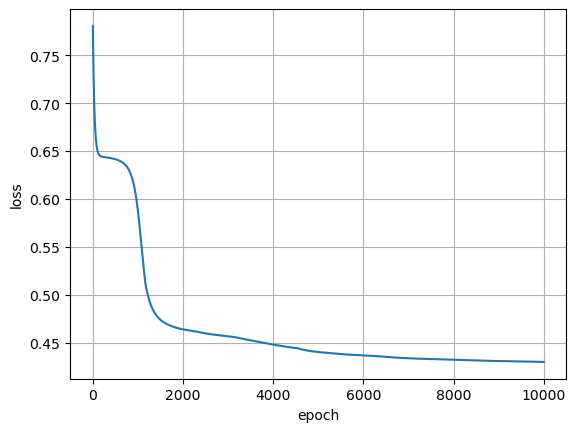

In [83]:
#数据可视化
plt.plot(epo,los)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.grid(True)#显示网格
plt.show()